In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
# functions

%matplotlib inline
import matplotlib.pyplot as plt

import datetime
import time

from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [2]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [22]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',
parse_dates=['timestamp_created',
'timestamp_updated', 'author.last_played'],
date_parser=dateparse)

In [23]:
dataset

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,2020-04-11 17:56:56
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,2021-01-19 18:17:11
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,2020-06-08 16:29:13
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,2020-05-17 11:36:55


In [24]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

<AxesSubplot:>

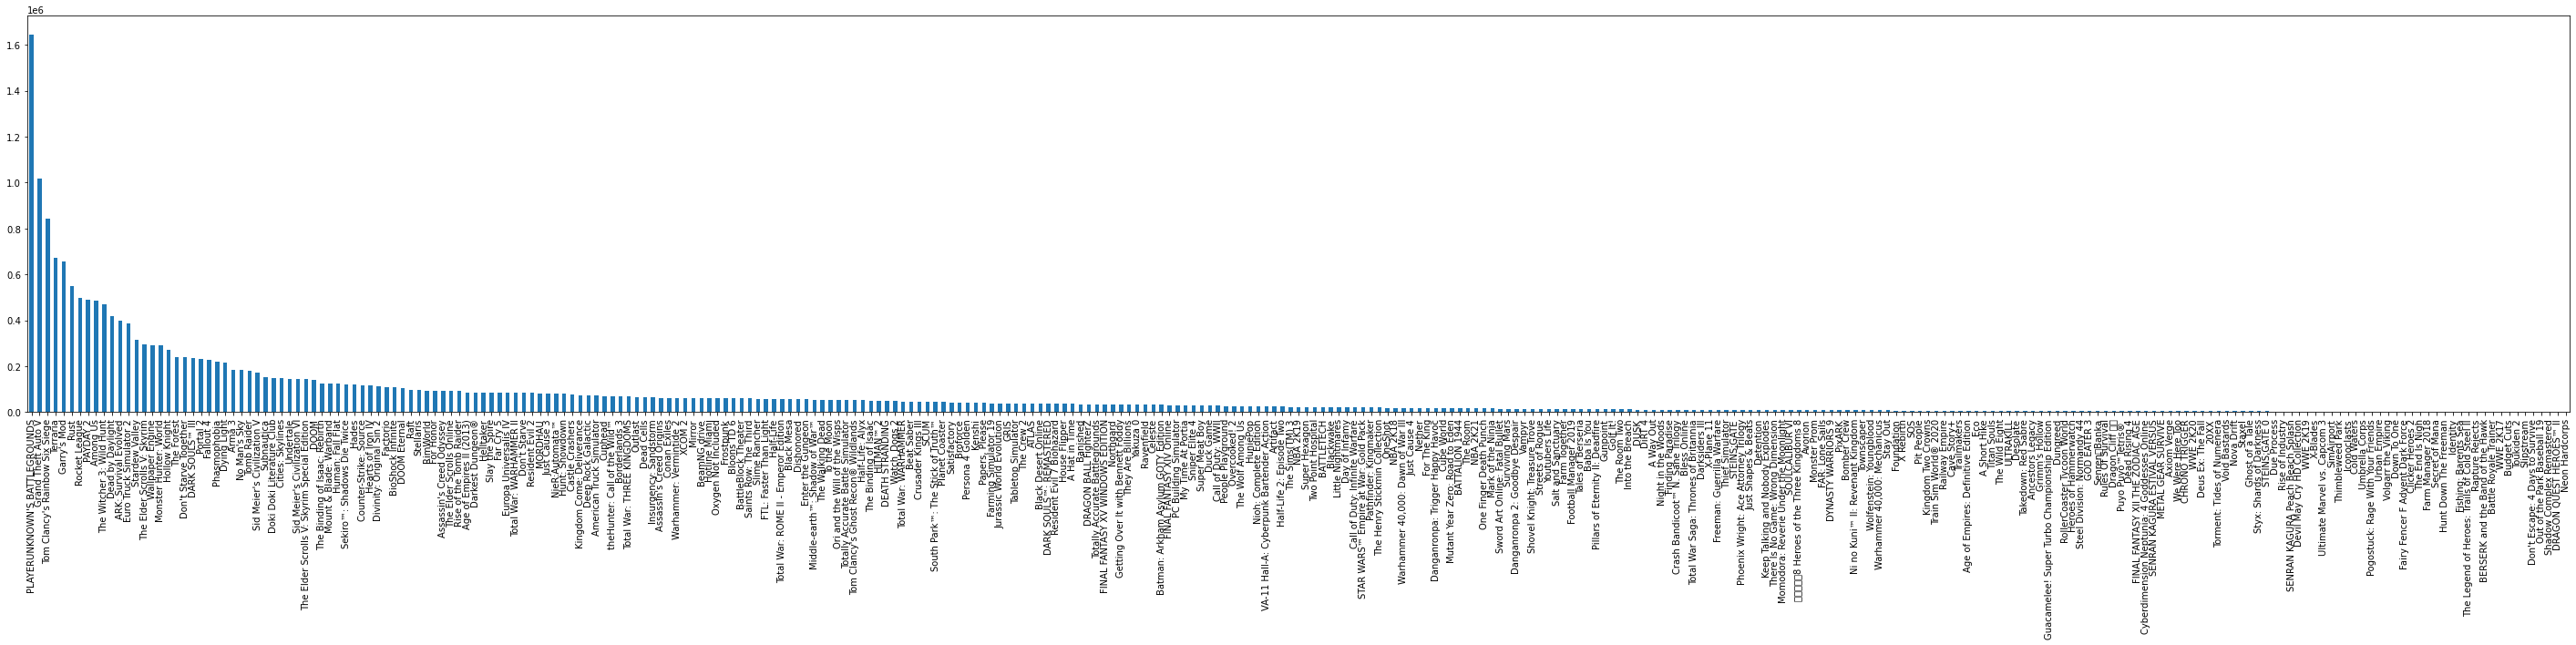

In [26]:
dataset['app_name'].value_counts().plot.bar(figsize = (50,8))

<AxesSubplot:>

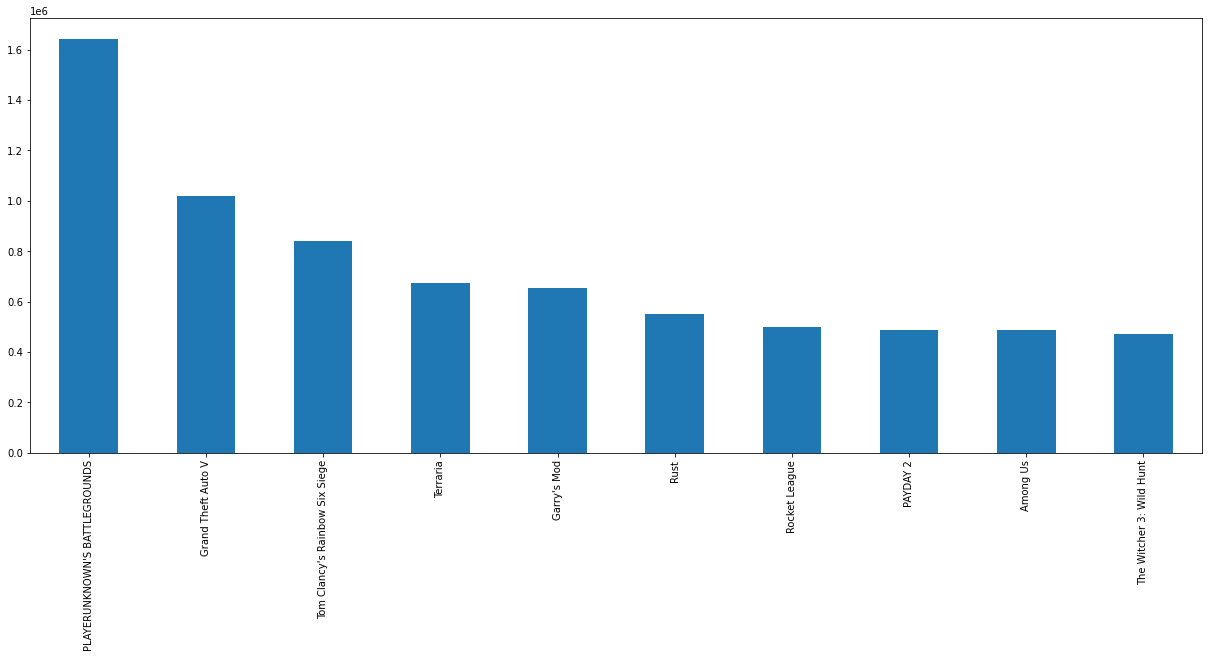

In [28]:
dataset['app_name'].value_counts()[:10].plot.bar(figsize = (21,8))

In [29]:
dataset.groupby('app_name')['recommended'].value_counts()

app_name                               recommended
20XX                                   True            3349
                                       False            261
A Hat in Time                          True           34318
                                       False            661
A Short Hike                           True            5797
                                                      ...  
Youtubers Life                         False           3055
theHunter: Call of the Wild™           True           57452
                                       False           9788
三国群英传8 Heroes of the Three Kingdoms 8  True            4677
                                       False           3434
Name: recommended, Length: 630, dtype: int64

In [39]:
dataset.groupby('app_name').recommended.sum().idxmax()

"PLAYERUNKNOWN'S BATTLEGROUNDS"

In [40]:
dataset.groupby('app_name').recommended.sum().idxmin()

'Neon Hardcorps'

In [35]:
dataset[dataset['app_name']=="PLAYERUNKNOWN'S BATTLEGROUNDS"]['received_for_free'].value_counts()

False    1582812
True       61443
Name: received_for_free, dtype: int64

In [41]:
dataset[dataset['app_name']=="Neon Hardcorps"]['received_for_free'].value_counts()

False    173
True      27
Name: received_for_free, dtype: int64

<AxesSubplot:>

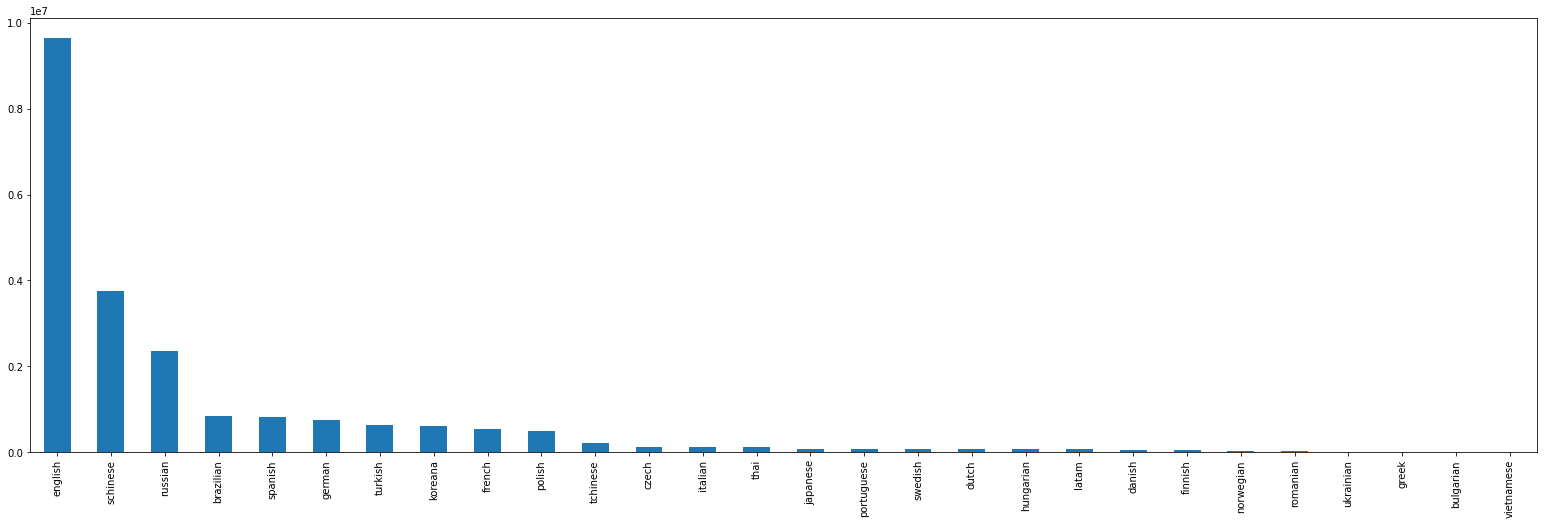

In [42]:
dataset['language'].value_counts().plot.bar(figsize = (27,8))

In [43]:
def filter_by_language(my_dataset, language_list):
    new_dataset = my_dataset[my_dataset['language'].isin(language_list)]
    return new_dataset

In [44]:
language_list = ['english', 'russian', 'schinese']
filt_ds = filter_by_language(dataset,language_list)

In [45]:
vfn= filt_ds[filt_ds['votes_funny'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_funny_percentage = vfn/filt_ds.shape[0]
print(vote_funny_percentage)

0.1220832361861832


In [46]:
vhn= filt_ds[filt_ds['votes_helpful'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_helpful_percentage = vhn/filt_ds.shape[0]
print(vote_helpful_percentage)

0.29162723635279375


<AxesSubplot:>

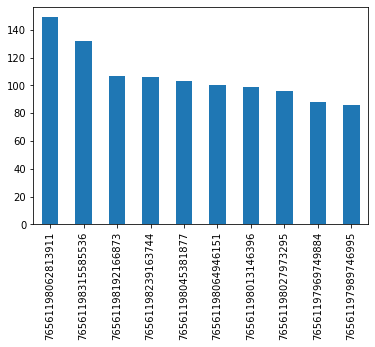

In [47]:
dataset['author.steamid'].value_counts()[:10].plot.bar()

In [48]:
dataset['author.steamid'].value_counts().idxmax()

76561198062813911

In [49]:
most_popular_reviewer = dataset[dataset['author.steamid'] == 76561198062813911]

In [55]:
most_popular_reviewer['app_name'].to_numpy()

array(['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two',
       'Portal 2', "Garry's Mod", "Sid Meier's Civilization V",
       'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica',
       'Human: Fall Flat', 'Banished', 'Celeste',
       'Getting Over It with Bennett Foddy', 'A Hat in Time',
       'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth',
       'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy',
       "Don't Escape: 4 Days to Survive", 'Volgarr the Viking',
       'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight',
       'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm',
       'Euro Truck Simulator 2', 'Foundation', 'Kenshi',
       'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal',
       'Age of Empires: Definitive Edition', 'Void Bastards',
       'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares',
       'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia',
       'Mount &

In [56]:
most_popular_reviewer['received_for_free'].value_counts()

False    145
True       4
Name: received_for_free, dtype: int64

In [57]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == False].recommended.value_counts()

True     142
False      3
Name: recommended, dtype: int64

In [58]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == True].recommended.value_counts()

True    4
Name: recommended, dtype: int64